In [16]:
import sys
sys.path.append("code")

# %load_ext autoreload

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice

from datetime import datetime, timedelta
import glob
import itertools
from pathlib import Path

In [18]:
from spice_tools import as_et, as_utc, as_tdb, generate_lro_ephemeris, calculate_eclipses
from simulation_tools import load_simulation_results, load_walltime_duration
from simulation_tools import pos_names, acc_names, irr_names, panels_count_names
from plotting import format_plot, save_plot

In [19]:
# df_simulation = load_simulation_results(Path("../results/baseline"))
# df_simulation = load_simulation_results(Path("../results/2023-01-26T00-21-00-b3197/84"))
df_simulation = load_simulation_results(Path("../results/2023-01-27T10-00-57-77048/95"))  # June
# df_simulation = load_simulation_results(Path("../results/2023-01-27T10-00-57-77048/67"))  # September
df_simulation

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,panels_vis_ill_moon,t_et,r,h,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun,acc_rp_moon
t,,,,,,,,,,,,,,,,,,,,,
2010-06-26 06:00:00+00:00,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697884,...,321,3.308041e+08,1.794980e+06,58979.771131,1.524555e+11,1.521155,0.000012,6.724166e-08,6.773406e-08,8.506908e-10
2010-06-26 06:00:10+00:00,146121.070439,-9685.380837,-1.788896e+06,1628.782473,216.416904,141.908627,1.787263e+06,0.007413,1.554783,0.698581,...,320,3.308041e+08,1.794880e+06,58880.028388,1.524555e+11,1.521239,0.000012,6.723671e-08,6.772830e-08,8.595432e-10
2010-06-26 06:00:20+00:00,162402.450080,-7520.808281,-1.787401e+06,1627.470320,216.494582,157.064408,1.787255e+06,0.007413,1.554783,0.699428,...,319,3.308041e+08,1.794780e+06,58779.692365,1.524555e+11,1.521275,0.000012,6.723179e-08,6.772264e-08,8.684685e-10
2010-06-26 06:00:30+00:00,178670.014833,-5355.549851,-1.785755e+06,1626.019572,216.554066,172.207739,1.787245e+06,0.007412,1.554783,0.700421,...,322,3.308041e+08,1.794679e+06,58678.784208,1.524555e+11,1.521261,0.000012,6.722689e-08,6.771692e-08,8.755865e-10
2010-06-26 06:00:40+00:00,194922.381410,-3189.787751,-1.783957e+06,1624.430796,216.595313,187.336947,1.787235e+06,0.007410,1.554782,0.701525,...,323,3.308041e+08,1.794577e+06,58577.329860,1.524555e+11,1.521213,0.000012,6.722203e-08,6.771106e-08,8.826795e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:24:20.000010+00:00,22597.427117,-29416.122676,-1.796482e+06,1633.021291,215.420431,27.775292,1.787305e+06,0.008442,1.552923,0.703061,...,331,3.308379e+08,1.796865e+06,60864.995417,1.524594e+11,1.518128,0.000012,6.732255e-08,6.776676e-08,7.818043e-10
2010-06-26 15:24:30.000010+00:00,38926.449733,-27260.685637,-1.796128e+06,1632.760180,215.663899,42.953282,1.787304e+06,0.008440,1.552923,0.703297,...,330,3.308379e+08,1.796757e+06,60757.015013,1.524594e+11,1.518298,0.000012,6.731699e-08,6.776221e-08,7.875502e-10
2010-06-26 15:24:40.000010+00:00,55252.169629,-25102.906255,-1.795623e+06,1632.360743,215.888901,58.130245,1.787302e+06,0.008439,1.552923,0.703575,...,330,3.308379e+08,1.796648e+06,60648.261664,1.524594e+11,1.518467,0.000012,6.731144e-08,6.775759e-08,7.935214e-10


In [20]:
df_ephemeris = generate_lro_ephemeris(df_simulation["t_et"])
df_ephemeris

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,t_et,r,h
t,,,,,,,,,
2010-06-26 06:00:00+00:00,129827.263859,-11849.086014,-1.790239e+06,1629.955691,216.321125,126.742167,3.308041e+08,1.794980e+06,58979.771131
2010-06-26 06:00:10+00:00,146121.070764,-9685.381514,-1.788896e+06,1628.782488,216.416766,141.908965,3.308041e+08,1.794880e+06,58880.026732
2010-06-26 06:00:20+00:00,162402.449919,-7520.810983,-1.787401e+06,1627.470185,216.494321,157.065019,3.308041e+08,1.794780e+06,58779.685840
2010-06-26 06:00:30+00:00,178670.012113,-5355.555569,-1.785755e+06,1626.019184,216.553733,172.208456,3.308041e+08,1.794679e+06,58678.770664
2010-06-26 06:00:40+00:00,194922.373413,-3189.796959,-1.783957e+06,1624.430132,216.594956,187.337573,3.308041e+08,1.794577e+06,58577.308902
...,...,...,...,...,...,...,...,...,...
2010-06-26 15:24:20.000010+00:00,22698.314171,-29400.847664,-1.796482e+06,1633.020438,215.399876,27.864838,3.308379e+08,1.796866e+06,60866.205491
2010-06-26 15:24:30.000010+00:00,39027.323512,-27245.616594,-1.796128e+06,1632.758384,215.643261,43.042580,3.308379e+08,1.796758e+06,60758.269112
2010-06-26 15:24:40.000010+00:00,55353.020924,-25088.044015,-1.795621e+06,1632.358053,215.868179,58.219175,3.308379e+08,1.796650e+06,60649.562251


In [21]:
def calculate_eclipse_times(timestamps):
    occultations = calculate_eclipses("Sun", "Earth", "LRO", timestamps[0], timestamps[-1])
    
    print(f"LRO observing Sun occultation due to Earth:")
    if not occultations:
        print(" - No occultations")
    for t_start, t_end, occ_type in occultations:
        duration = (t_end - t_start) / 60  # min
        duration_h = duration // 60
        duration_min = duration - duration_h * 60
        print(f" - {as_utc(t_start)} - {as_utc(t_end)} ({occ_type} for {duration_h:.0f}:{duration_min:.0f})")

calculate_eclipse_times(df_simulation["t_et"])

LRO observing Sun occultation due to Earth:
 - 2010-06-26 09:52:32 UTC - 2010-06-26 10:22:53 UTC (PARTIAL for 0:30)
 - 2010-06-26 10:22:53 UTC - 2010-06-26 10:51:52 UTC (FULL for 0:29)
 - 2010-06-26 10:51:52 UTC - 2010-06-26 12:26:56 UTC (PARTIAL for 1:35)
 - 2010-06-26 12:26:56 UTC - 2010-06-26 12:55:56 UTC (FULL for 0:29)
 - 2010-06-26 12:55:56 UTC - 2010-06-26 13:26:33 UTC (PARTIAL for 0:31)


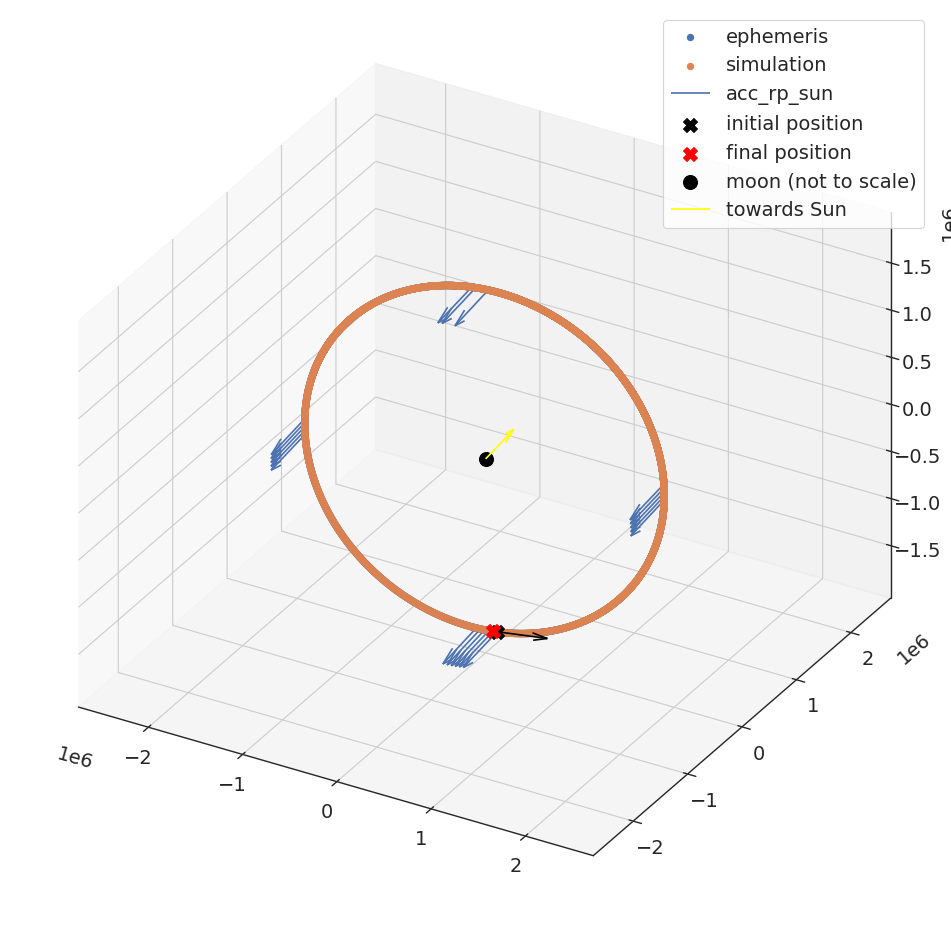

In [22]:
def plot_orbit_3d(df_ephemeris, df_simulation):
    def do_plot(df, label):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
    
    def do_plot_with_acc(df, label, acc_name):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
        df = df.iloc[::int(len(df.index) / 20)]
        acc = df[[f"{acc_name}_x", f"{acc_name}_y", f"{acc_name}_z"]]
        acc /= abs(acc.mean().mean())
        ax.quiver(df["pos_x"], df["pos_y"], df["pos_z"],
                  acc[f"{acc_name}_x"], acc[f"{acc_name}_y"], acc[f"{acc_name}_z"], length=2e5, zorder=-1, label=acc_name)
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection="3d", proj_type="ortho", computed_zorder=False)
    
    # do_plot(df.loc["2009-07-10":"2009-07-20"])
    # do_plot(df.loc["2009-10-10":"2009-10-20"])
    # do_plot(df.loc["2010-01-01":"2010-01-02"])
    
    do_plot(df_ephemeris, "ephemeris")
    do_plot_with_acc(df_simulation, "simulation", "acc_rp_sun")
    
    df_init = df_ephemeris.iloc[0]
    df_final = df_ephemeris.iloc[-1]
    ax.quiver(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], df_init["vel_x"], df_init["vel_y"], df_init["vel_z"], color="black", length=5e5, normalize=True)
    ax.scatter(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], c="black", marker="X", s=100, label="initial position", zorder=5)
    ax.scatter(df_final["pos_x"], df_final["pos_y"], df_final["pos_z"], c="red", marker="X", s=100, label="final position", zorder=5)
    
    ax.scatter(0, 0, 0, c="black", s=100, label="moon (not to scale)")
    
    pos_sun_init = df_simulation[["pos_sun_x", "pos_sun_y", "pos_sun_z"]].iloc[0] / df_simulation["r_sun"].iloc[0]
    ax.quiver(0, 0, 0, *pos_sun_init, length=6e5, color="yellow", label="towards Sun")
    
    ax.set_aspect("equal")
    
    # Top-down
    # ax.view_init(90, -90)
    # Front-on
    # ax.view_init(0, -90)
    
    plt.legend()
    
plot_orbit_3d(df_ephemeris, df_simulation)

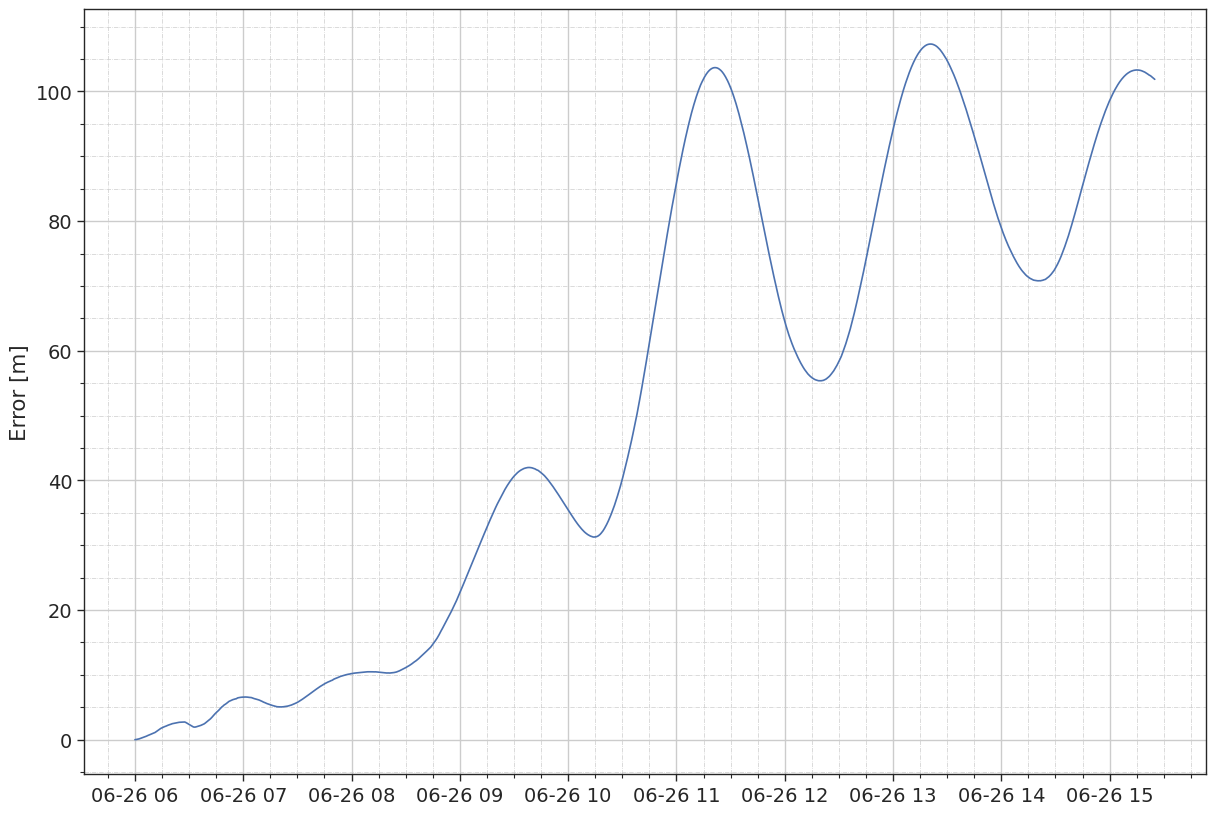

In [23]:
def plot_error(df_ephemeris, df_simulation):
    error = df_ephemeris[pos_names] - df_simulation[pos_names]
    error["total"] = np.sqrt(np.square(error).sum(axis=1))
    
    plt.figure(figsize=[12, 8])
    plt.plot(error.index, error["total"])
    plt.ylabel("Error [m]")
    format_plot()
    
plot_error(df_ephemeris, df_simulation)

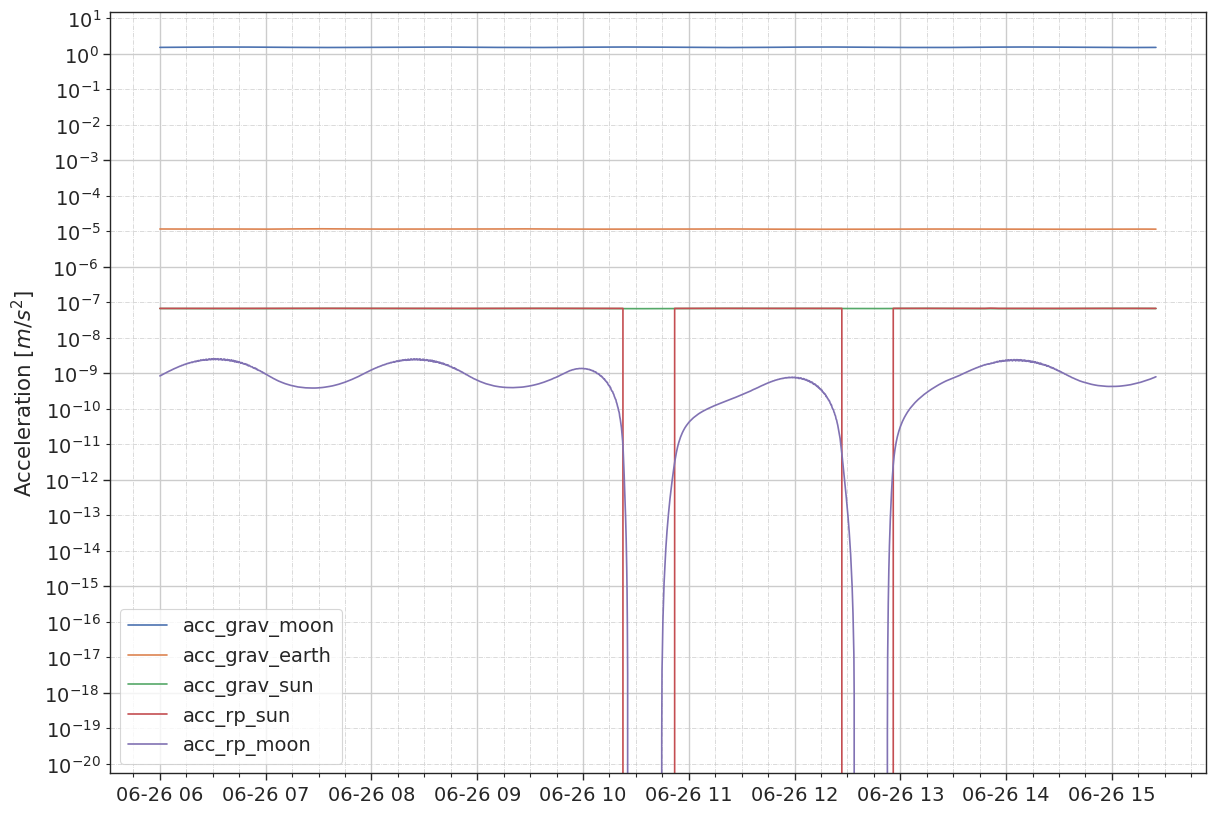

In [24]:
def plot_accelerations(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for acc in acc_names:
        if acc in df_simulation.columns:
            plt.plot(df_simulation.index, df_simulation[acc], label=acc)
    
    plt.legend()
    plt.ylabel("Acceleration [$m/s^2$]")
    plt.yscale("log")
    format_plot()
    
plot_accelerations(df_simulation)

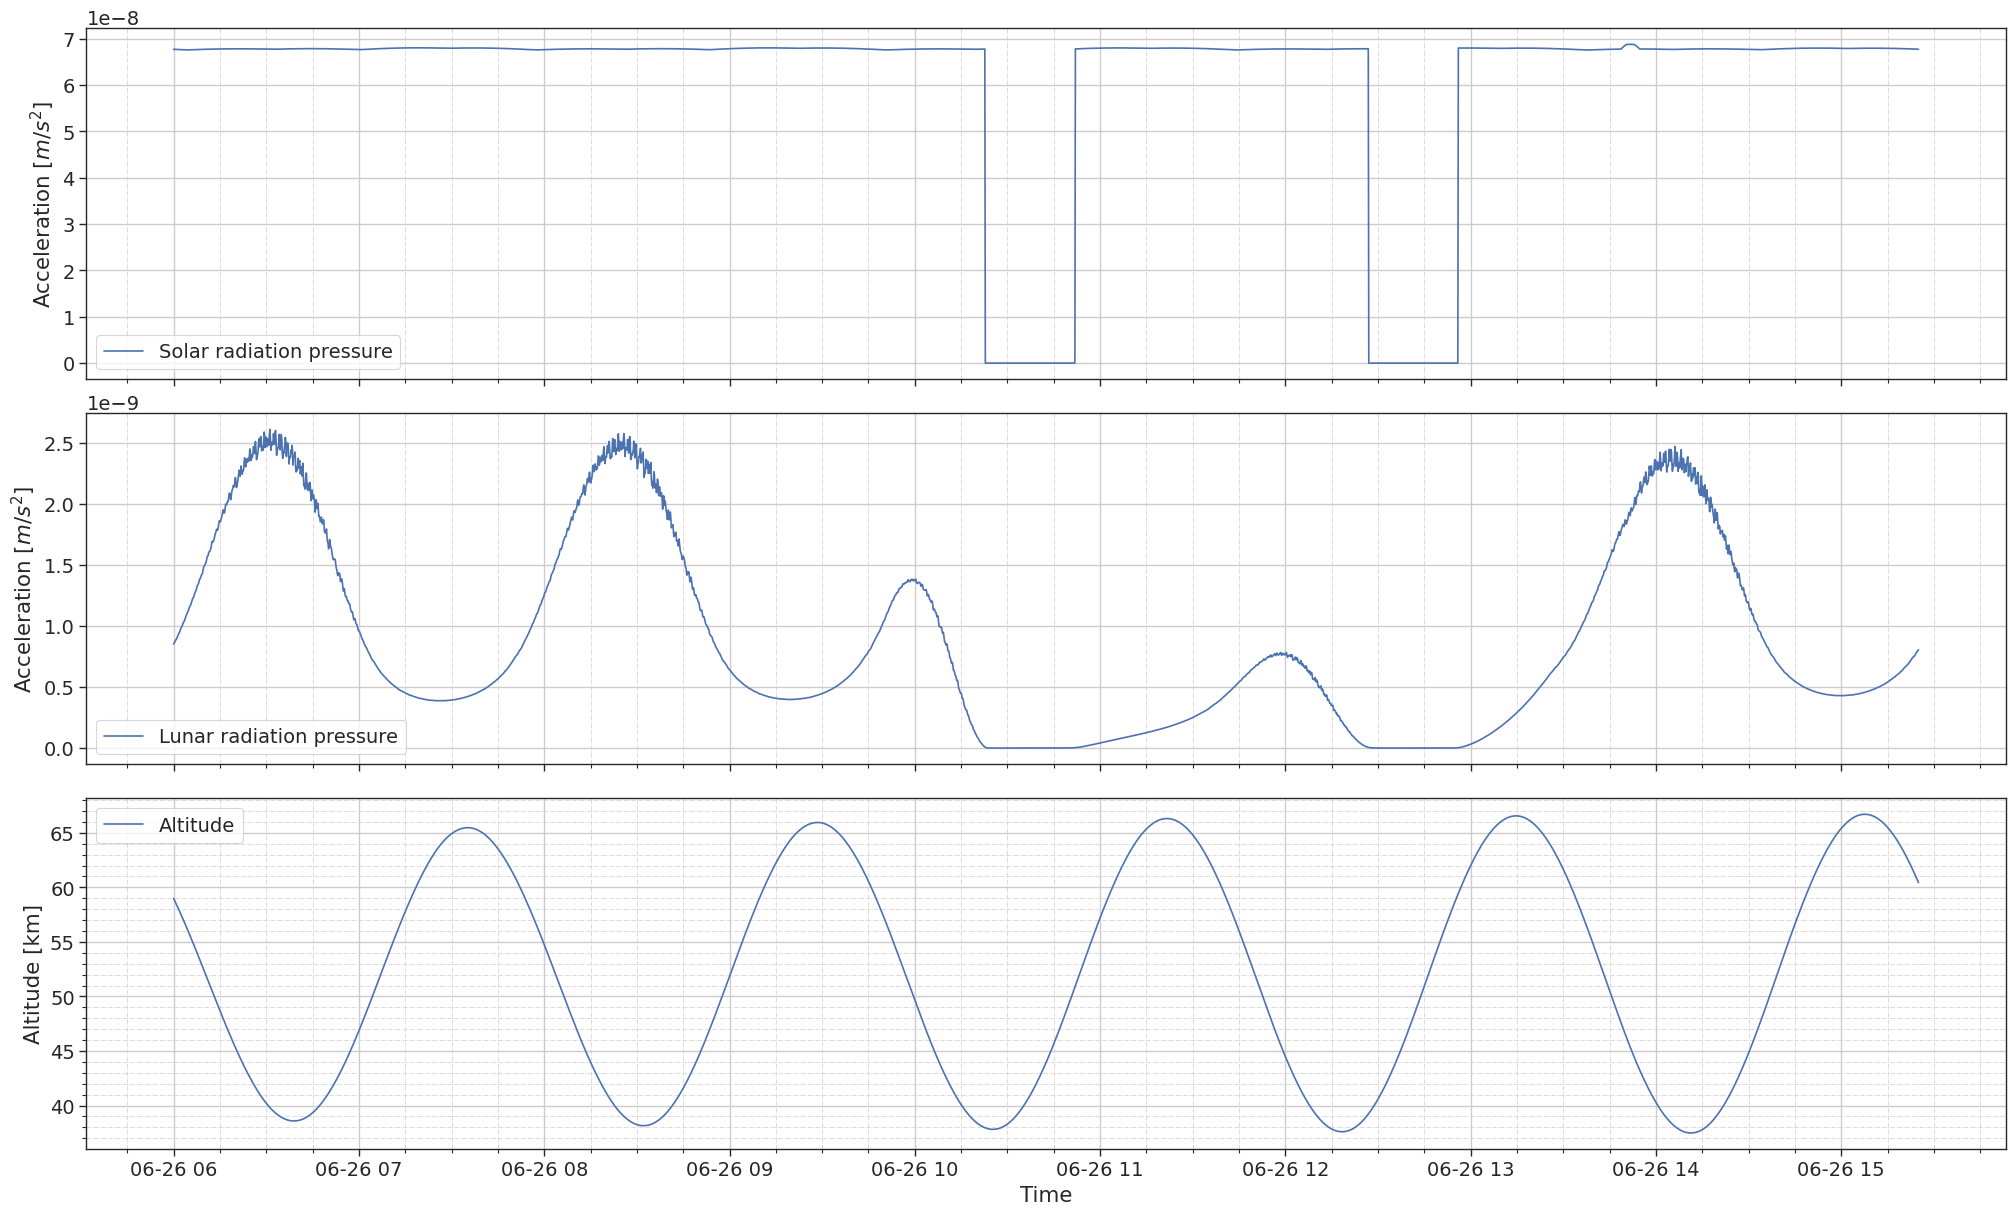

In [25]:
def plot_rp_acceleration(df_simulation):
    fig, axs = plt.subplots(3, 1, figsize=[20, 12], sharex=True)
    
    axs[0].plot(df_simulation.index, df_simulation["acc_rp_sun"], label="Solar radiation pressure")
    axs[1].plot(df_simulation.index, df_simulation["acc_rp_moon"], label="Lunar radiation pressure")
    axs[2].plot(df_simulation.index, df_simulation["h"] / 1e3, label="Altitude")
    
    axs[-1].set_xlabel("Time")
    axs[0].set_ylabel("Acceleration [$m/s^2$]")
    axs[1].set_ylabel("Acceleration [$m/s^2$]")
    axs[2].set_ylabel("Altitude [km]")

    for ax in axs:
        ax.legend()
    
    format_plot()
    
plot_rp_acceleration(df_simulation)

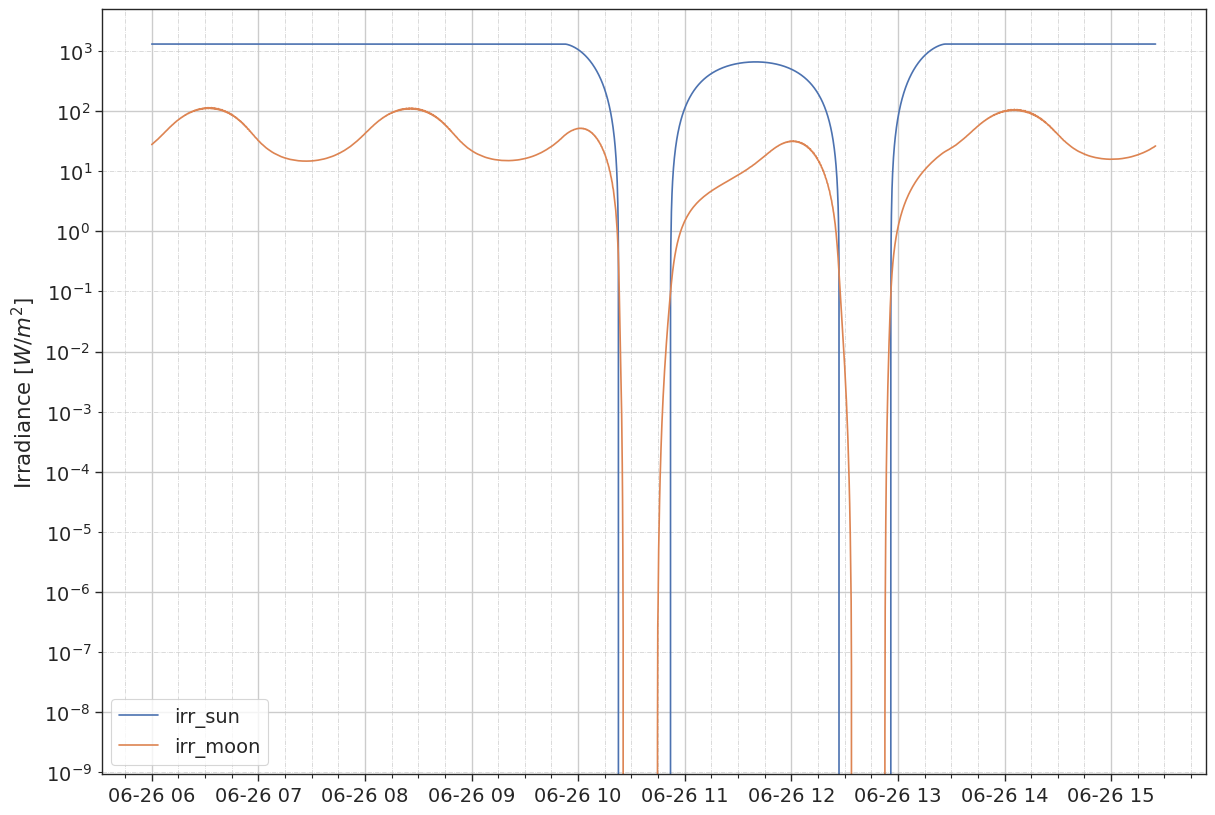

In [26]:
def plot_received_irradiance(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for irr in irr_names:
        plt.plot(df_simulation.index, df_simulation[irr], label=irr)
    
    plt.legend()
    plt.ylabel("Irradiance [$W/m^2$]")
    plt.yscale("log")
    format_plot()
    
plot_received_irradiance(df_simulation)

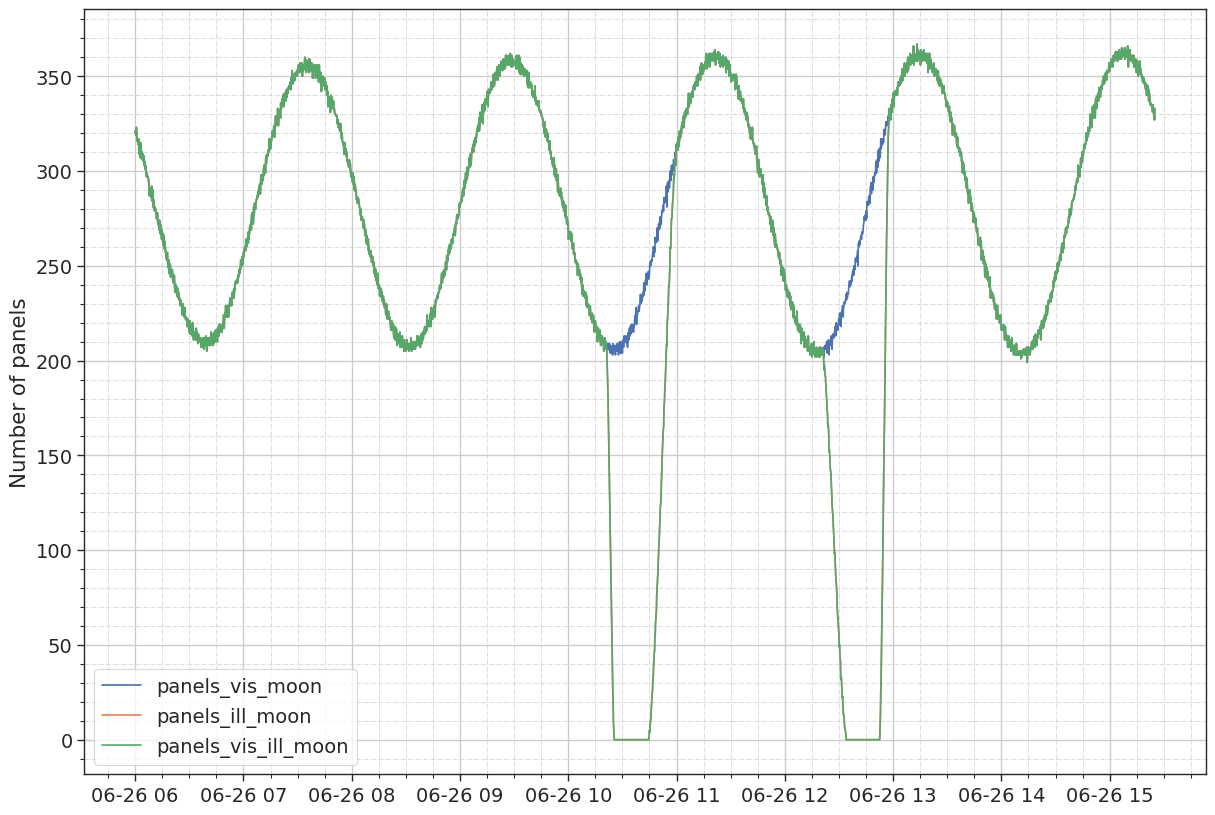

In [27]:
def plot_source_panels(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for panel_count in panels_count_names:
        plt.plot(df_simulation.index, df_simulation[panel_count], label=panel_count)
    
    plt.legend()
    plt.ylabel("Number of panels")
    format_plot()
    
plot_source_panels(df_simulation)

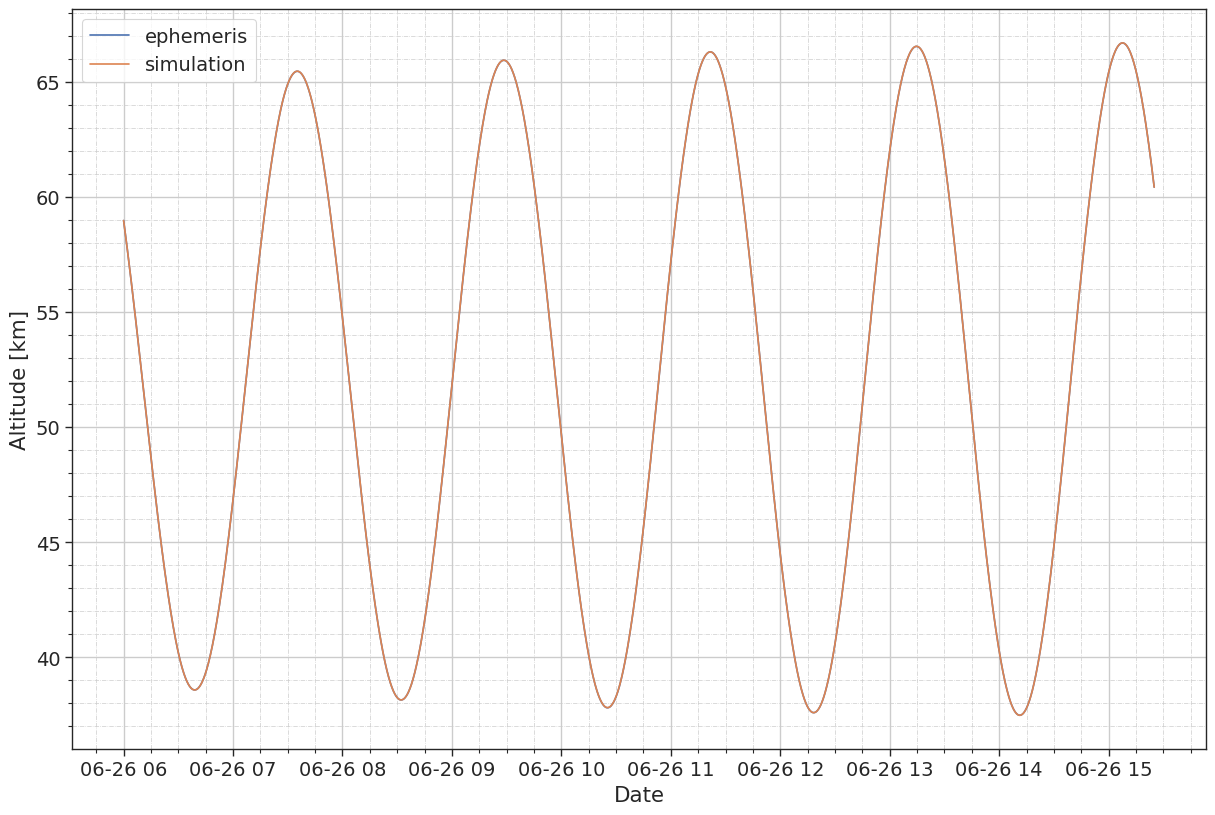

In [28]:
def plot_altitude(df_ephemeris, df_simulation):
    from datetime import datetime as dt
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, df_ephemeris["h"] / 1e3, label="ephemeris")
    plt.plot(df_simulation.index, df_simulation["h"] / 1e3, label="simulation")
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    format_plot()

plot_altitude(df_ephemeris, df_simulation)

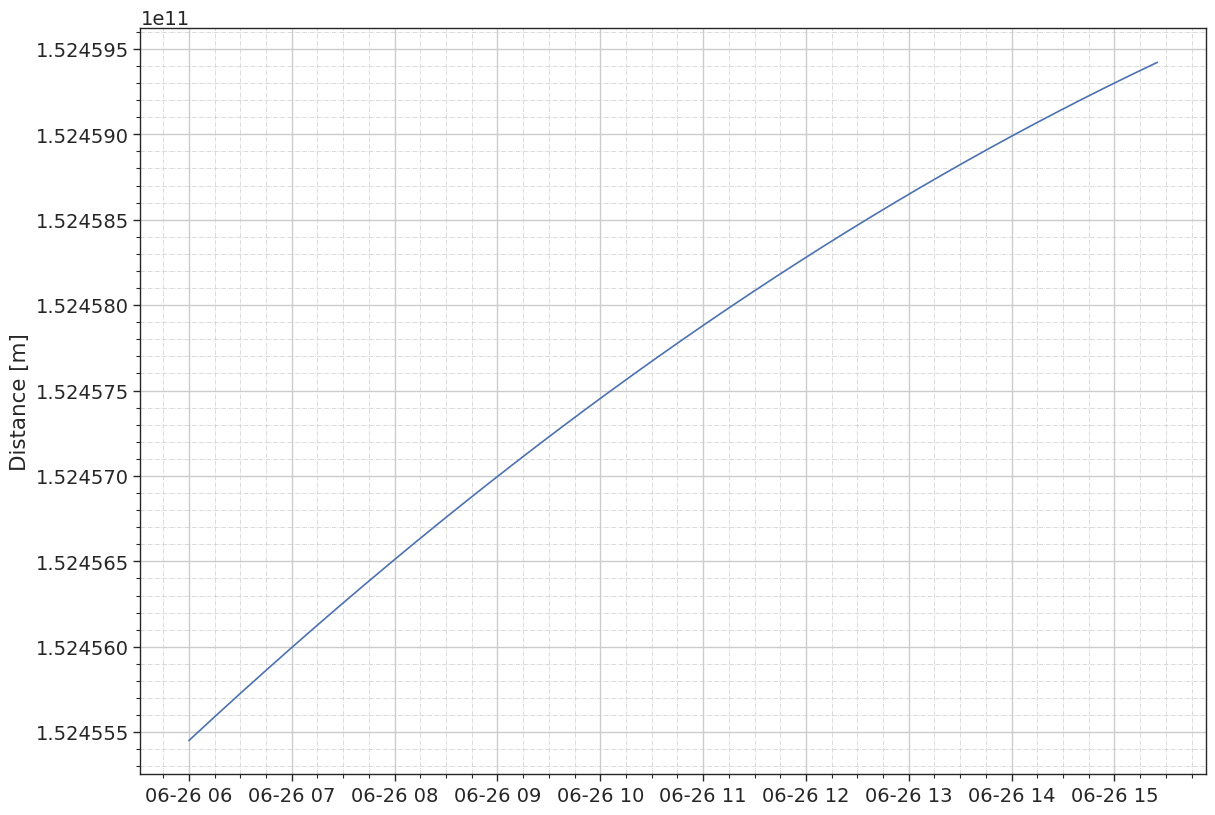

In [29]:
def plot_distance_moon_sun(df_simulation):
    plt.figure(figsize=[12, 8])
    
    plt.plot(df_simulation.index, df_simulation["r_sun"])
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.ylabel("Distance [m]")
    format_plot()
    
plot_distance_moon_sun(df_simulation)

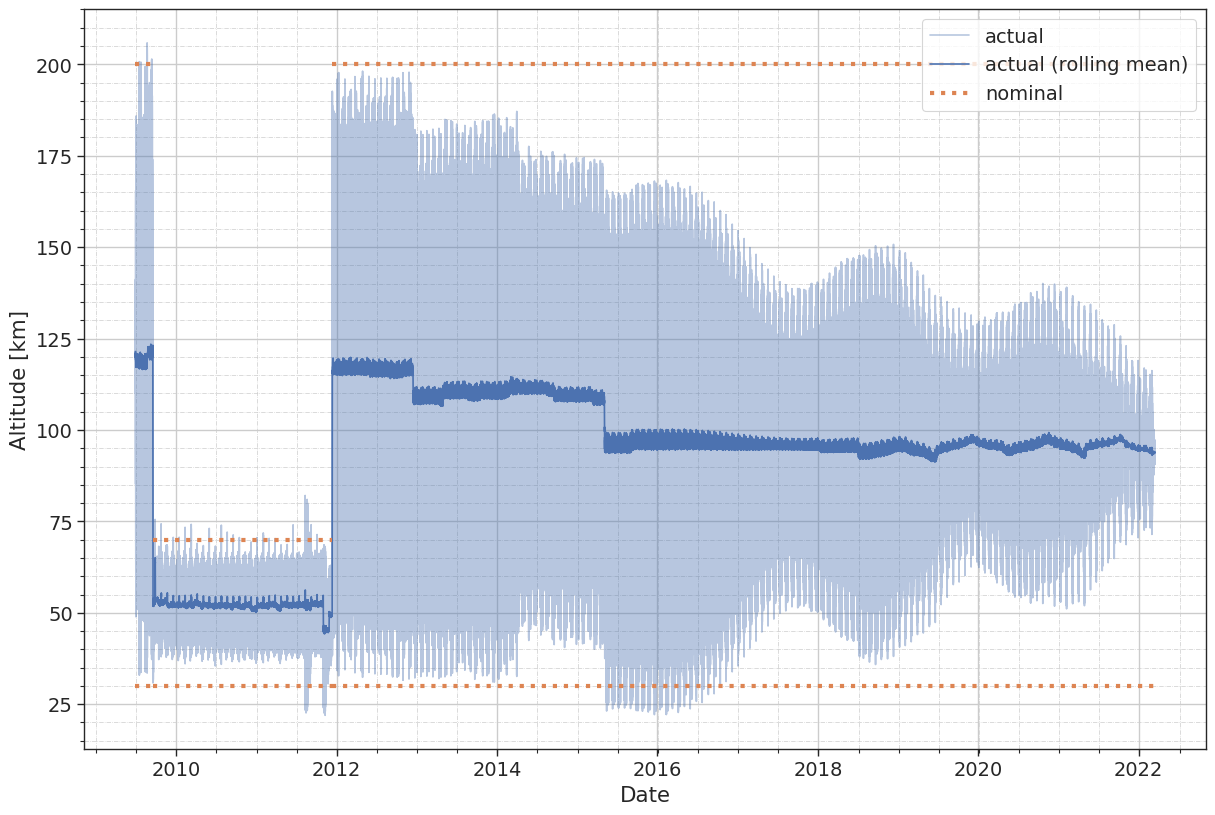

In [30]:
def plot_altitude_mission():
    from datetime import datetime as dt
    from matplotlib import dates
    
    t_start = datetime(2009, 6, 28)  # start of commissioning
    t_end = datetime(2022, 3, 15)    # latest available date
    # Generate hourly timestamps
    # Cannot simply add 3600 s because of leap seconds
    t_et = []
    t = t_start
    while t <= t_end:
        t_et.append(as_et(t.isoformat()))
        t += timedelta(hours=1)
        
    df_ephemeris = generate_lro_ephemeris(t_et)
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, df_ephemeris["h"] / 1e3, c="C0", alpha=0.4, label="actual")
    plt.plot(df_ephemeris.index, df_ephemeris["h"].rolling(20).mean() / 1e3, c="C0", label="actual (rolling mean)")
    
    plt.hlines(50-20, dates.datestr2num("2009-9-16"), dates.datestr2num("2011-12-12"), color="C1", ls=":", lw=3, label="nominal")
    plt.hlines(50+20, dates.datestr2num("2009-9-16"), dates.datestr2num("2011-12-12"), color="C1", ls=":", lw=3)
    plt.hlines(30, dates.datestr2num("2009-06-28"), dates.datestr2num("2009-9-16"), color="C1", ls=":", lw=3)
    plt.hlines(200, dates.datestr2num("2009-06-28"), dates.datestr2num("2009-9-16"), color="C1", ls=":", lw=3)
    plt.hlines(30, dates.datestr2num("2011-12-12"), dates.datestr2num("2022-03-15"), color="C1", ls=":", lw=3)
    plt.hlines(200, dates.datestr2num("2011-12-12"), dates.datestr2num("2022-03-15"), color="C1", ls=":", lw=3)
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    # plt.xlim([dt(2009, 9, 1), dt(2009, 11, 1)]) # entering mission orbit
    # plt.xlim([dt(2009, 9, 10), dt(2010, 6, 30)])
    
    format_plot()
    
plot_altitude_mission()